In [1]:
import os
import json
import pickle
from collections import defaultdict
from collections import Counter
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
with open('mappings/Q3/playlist_datav2.pkl', 'rb') as fp:
    playlist_data = pickle.load(fp)

In [3]:
list(playlist_data.items())[:5]

[(962000, (151, 43501164, 288087.178807947, 58, 1)),
 (962001, (143, 29174668, 204018.65734265733, 40, 1)),
 (962002, (75, 16744221, 223256.28, 58, 1)),
 (962003, (32, 7621816, 238181.75, 32, 1)),
 (962004, (27, 6261480, 231906.66666666666, 27, 1))]

In [4]:
# number_of_tracks 0 , total_duration 1, avg_song_length 2 , num albums 3, followers 4
ftrs = np.array([x[1] for x in playlist_data.items()])

In [5]:
ftrs[:5]

array([[1.51000000e+02, 4.35011640e+07, 2.88087179e+05, 5.80000000e+01,
        1.00000000e+00],
       [1.43000000e+02, 2.91746680e+07, 2.04018657e+05, 4.00000000e+01,
        1.00000000e+00],
       [7.50000000e+01, 1.67442210e+07, 2.23256280e+05, 5.80000000e+01,
        1.00000000e+00],
       [3.20000000e+01, 7.62181600e+06, 2.38181750e+05, 3.20000000e+01,
        1.00000000e+00],
       [2.70000000e+01, 6.26148000e+06, 2.31906667e+05, 2.70000000e+01,
        1.00000000e+00]])

In [6]:
np.quantile(ftrs[:,4], 0.9999)

1994.000100000063

In [7]:
# filter with >1 follower
num_followers = 1
m = [x[-1] > num_followers for x in ftrs]
q3 = ftrs[m]
print(len(q3))

245781


(array([43680., 55957., 40466., 31433., 21867., 16992., 12848.,  9478.,
         7686.,  5374.]),
 array([  4. ,  28.6,  53.2,  77.8, 102.4, 127. , 151.6, 176.2, 200.8,
        225.4, 250. ]),
 <BarContainer object of 10 artists>)

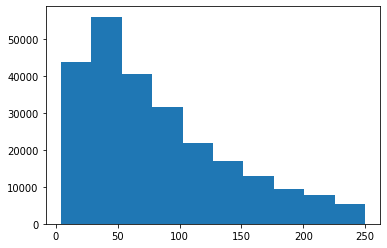

In [8]:
plt.hist(q3[:,0]) # num of tracks

(array([1.6191e+05, 6.5097e+04, 1.8227e+04, 4.8800e+02, 3.9000e+01,
        1.3000e+01, 2.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   8.47495028,  367.78519224,  727.09543419, 1086.40567614,
        1445.71591809, 1805.02616005, 2164.336402  , 2523.64664395,
        2882.9568859 , 3242.26712785, 3601.57736981]),
 <BarContainer object of 10 artists>)

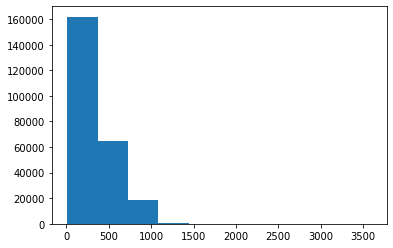

In [9]:
plt.hist(q3[:,1]*1.66667e-5) # total duration

(array([2.45742e+05, 2.80000e+01, 5.00000e+00, 2.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.97520654,  15.38285629,  29.79050603,  44.19815578,
         58.60580552,  73.01345527,  87.42110501, 101.82875476,
        116.2364045 , 130.64405425, 145.05170399]),
 <BarContainer object of 10 artists>)

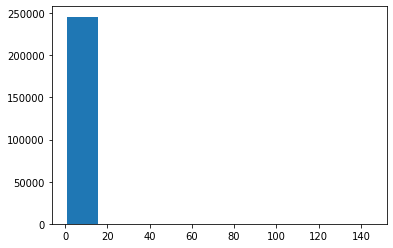

In [10]:
plt.hist(q3[:,2]*1.66667e-5) # avg song length

(array([54411., 65656., 45295., 31024., 20414., 13553.,  8609.,  4689.,
         1868.,   262.]),
 array([  2.,  26.,  50.,  74.,  98., 122., 146., 170., 194., 218., 242.]),
 <BarContainer object of 10 artists>)

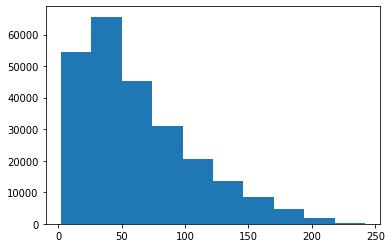

In [11]:
plt.hist(q3[:,3]) # num albums

(array([2.45754e+05, 1.70000e+01, 3.00000e+00, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.00000e+00, 7.16610e+03, 1.43302e+04, 2.14943e+04, 2.86584e+04,
        3.58225e+04, 4.29866e+04, 5.01507e+04, 5.73148e+04, 6.44789e+04,
        7.16430e+04]),
 <BarContainer object of 10 artists>)

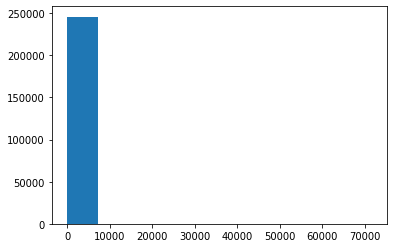

In [12]:
plt.hist(q3[:,4]) # followers

Text(0, 0.5, 'followers')

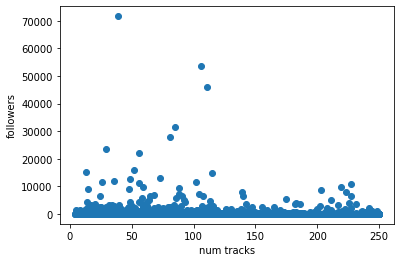

In [13]:
plt.scatter(q3[:,0] , q3[:,4])
plt.xlabel('num tracks')
plt.ylabel('followers')

Text(0, 0.5, 'followers')

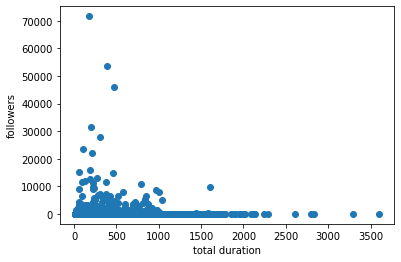

In [14]:
plt.scatter(q3[:,1]*1.66667e-5 , q3[:,4])
plt.xlabel('total duration')
plt.ylabel('followers')

Text(0, 0.5, 'followers')

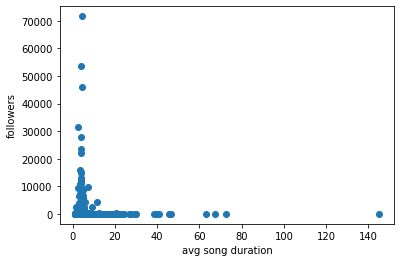

In [15]:
plt.scatter(q3[:,2]*1.66667e-5 , q3[:,4])
plt.xlabel('avg song duration')
plt.ylabel('followers')

Text(0, 0.5, 'followers')

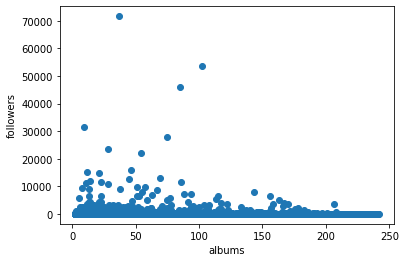

In [16]:
plt.scatter(q3[:,3] , q3[:,4])
plt.xlabel('albums')
plt.ylabel('followers')

In [17]:
y = q3[:,4]
x = q3[:,0]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.061
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.303
Time:                        04:26:53   Log-Likelihood:            -1.7153e+06
No. Observations:              245781   AIC:                         3.431e+06
Df Residuals:                  245779   BIC:                         3.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7358      0.909      7.410      0.0

In [18]:
y = q3[:,4]
x = q3[:,1]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.265
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.261
Time:                        04:26:53   Log-Likelihood:            -1.7153e+06
No. Observations:              245781   AIC:                         3.431e+06
Df Residuals:                  245779   BIC:                         3.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6835      0.896      7.460      0.0

In [19]:
y = q3[:,4]
x = q3[:,2]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1455
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.703
Time:                        04:26:53   Log-Likelihood:            -1.7153e+06
No. Observations:              245781   AIC:                         3.431e+06
Df Residuals:                  245779   BIC:                         3.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3666      3.019      2.109      0.0

In [20]:
y = q3[:,4]
x = q3[:,3]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1968
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.657
Time:                        04:26:53   Log-Likelihood:            -1.7153e+06
No. Observations:              245781   AIC:                         3.431e+06
Df Residuals:                  245779   BIC:                         3.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8290      0.907      8.632      0.0

In [21]:
x = q3[:, :4]
y = q3[:,4]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.107
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0144
Time:                        04:26:53   Log-Likelihood:            -1.7153e+06
No. Observations:              245781   AIC:                         3.431e+06
Df Residuals:                  245776   BIC:                         3.431e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4201      4.358      1.703      0.0

In [22]:
y = np.log(q3[:,4])
x = q3[:,0]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3312.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:26:54   Log-Likelihood:            -2.0854e+05
No. Observations:              245781   AIC:                         4.171e+05
Df Residuals:                  245779   BIC:                         4.171e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9087      0.002    459.518      0.0

In [23]:
y = np.log(q3[:,4])
x = q3[:,1]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3290.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:26:54   Log-Likelihood:            -2.0856e+05
No. Observations:              245781   AIC:                         4.171e+05
Df Residuals:                  245779   BIC:                         4.171e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9110      0.002    467.370      0.0

In [24]:
y = np.log(q3[:,4])
x = q3[:,2]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     35.78
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.21e-09
Time:                        04:26:54   Log-Likelihood:            -2.1017e+05
No. Observations:              245781   AIC:                         4.203e+05
Df Residuals:                  245779   BIC:                         4.204e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9627      0.007    145.636      0.0

In [26]:
y = np.log(q3[:,4])
x = q3[:,3]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3113.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:27:38   Log-Likelihood:            -2.0864e+05
No. Observations:              245781   AIC:                         4.173e+05
Df Residuals:                  245779   BIC:                         4.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9118      0.002    461.964      0.0

In [27]:
y,_ = stats.boxcox(q3[:,4])

x = q3[:,0]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

x = q3[:,1]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())


x = q3[:,2]*1.66667e-5
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

x = q3[:,3]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())


x = q3[:, :4]
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
# print(start, end)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5372.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:27:51   Log-Likelihood:             4.3583e+05
No. Observations:              245781   AIC:                        -8.717e+05
Df Residuals:                  245779   BIC:                        -8.716e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3913      0.000   2722.985      0.0